# Aim

In this assignment, we implement linear regression via gradient descent.

# Data Generation

Before we implement the regression, let us first generate the data. 

Given we need $n$ points of $(m+1)$ dimensional data, we can generate an input $X$, $n\times (m+1)$ matrix uniformly sampled. For the linear parameters $\beta$, we generate an array of length $m+1$. To simulate error, we generate an array $e$ of length $n$. Hence, the output values of our experiment is given by $Y = X\beta + e$ sampled from a Gaussian of mean 0 and $\sigma=$`sigma`

For this, we define a function `make_data` that takes inputs `sigma`, `n`, `m` and returns $X, Y, \beta$

In [1]:
import numpy as np # For matrix functions

In [2]:
import matplotlib.pyplot as plt # for plotting

In [3]:
def make_data(sigma, n, m):
    X = np.random.random((n, m+1))
    X[:, 0] = 1
    beta = np.random.random((m+1, 1)) * 0.9 + 0.1
    e = np.random.normal(scale=sigma, size=(n, 1))
    return X, X @ beta + e, beta

## Cost function

Since we have assumed an error of the gaussian form with a constant sigma, we can apply the maximum likelihood principle and find the appropriate cost function.

Hence, our cost function is $0.5 \text{MSE}$, which is given by

$$\text{MSE}=\frac{||X\beta-Y||^2}{2n}$$

To apply gradient descent, we must find the gradient of the cost at each point. In this case, we get

$$\triangle_{\beta} 0.5\text{MSE} = X^T(X\beta - Y)/n$$

We define two functions to this effect

In [4]:
def cost_function(X, beta_guess, Y):
    errors = X@beta_guess - Y
    return (errors.T @ errors) / len(errors)

def gradient(X, beta_guess, Y):
    return X.T @ (X@beta_guess - Y) * 2 / len(Y)

# Implementing Linear Regression

Now we are set to implement the Linear Regression. The algorithm is as follows

1. We generate a random `beta_guess` of the same size as the number of features.
2. For `k` times, we do the following; where `k` is the maximum epochs
    1. update `beta_guess` as `beta_guess-gradient * alpha`, where `alpha` is the learning parameter.
    2. evaluate the `cost` and record it
    3. if `costs[i-1] - costs[i] < tau`, break out of loop; where `tau` is threshold
3. return beta_guess, costs, and total number of epochs run

In [5]:
def linear_regression(X, Y, k, tau, alpha=0.001):    
    beta_guess = np.random.random((X.shape[1], 1))
    costs = np.full(k, 0.)
    n = k
    for i in range(0, k):
        beta_guess -= gradient(X, beta_guess, Y) * alpha
        costs[i] = cost_function(X, beta_guess, Y)
        if i>0 and np.abs(costs[i-1] - costs[i]) < tau:
            n = i
            break
    return beta_guess, costs, n

### Checking if code works

To check if the code works, let us fit a data set with `n=100` and `m=1`, that is, a 2D input data

In [6]:
X, Y, b = make_data(0.03, 100, 1)
b1, costs, epochs_run = linear_regression(X, Y, 250000, 1e-7)

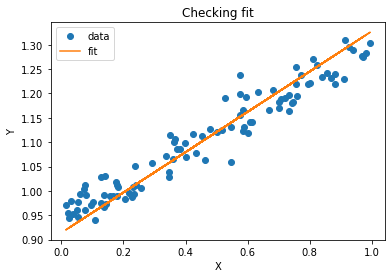

In [7]:
plt.plot(X[:, 1], Y, "o", label="data")
plt.plot(X[:, 1], X@b1, label="fit")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Checking fit");

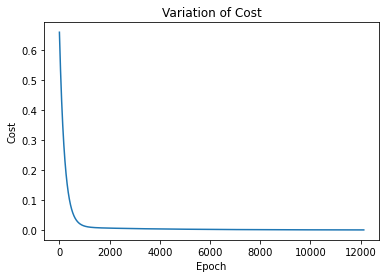

In [8]:
plt.plot(costs[1:epochs_run])
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Variation of Cost");

# Variation of goodness of fit with parameters

To measure goodness of fit, we can use 2 values of the fitting process.
1. Final Cost after some set epochs - This is the final cost when run for a finite number of epochs. This is useful when our major constraint is time/computational cost, and measures how well we can explain given data
2. Beta norm - This is the distance between $\beta$ and $\beta^*$, the actual parameters. This is useful when our major constraint is predectability, and it measures how well we can explain the underlying mechanism of creating data. However, we may not have this in an actual experiment. Then, we must use Final Cost only.

## Variation with respect to Sigma

Since sigma represents the size of error in the input, we expect that the fitting would be harder/take longer and less correct. To verify, we measure the two measures of goodness of fit for sigma in `0:0.02:0.5` and average over `10` runs.

In [9]:
def scan_sigma(average_over):
    ss = np.arange(0, 0.5, 0.02)
    s_costs = np.zeros(ss.size)
    beta_norm = np.zeros(ss.size)
    n = 50
    for i in range(len(ss)):
        for k in range(average_over):
            X, Y, bs = make_data(ss[i], n, 5)
            b, costs, _ = linear_regression(X, Y, 25000, 1e-8)
            s_costs[i] += costs[-1]
            beta_norm[i] += np.linalg.norm(b-bs) / n
        s_costs[i] /= average_over
        beta_norm[i] /= average_over
    return ss, s_costs, beta_norm

In [10]:
ss, s_costs, s_beta_norm = scan_sigma(10)

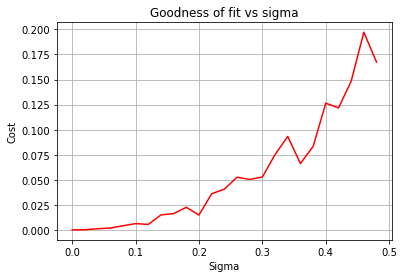

In [11]:
plt.plot(ss, s_costs, "r")
plt.title("Goodness of fit vs sigma")
plt.xlabel("Sigma")
plt.ylabel("Cost")
plt.grid()

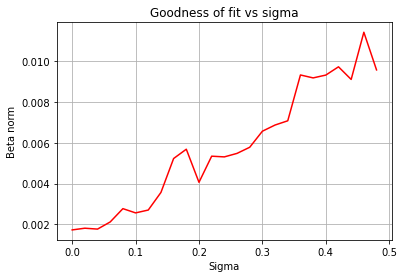

In [12]:
plt.plot(ss, s_beta_norm, "r")
plt.title("Goodness of fit vs sigma")
plt.xlabel("Sigma")
plt.ylabel("Beta norm")
plt.grid()

### Observations

As we can see clearly from the graphs, both measures vary as expected. That is, the fit becomes worse as we increase `sigma`.

## Variation with respect to n

As we have more and more data points, we can show that the variance of the data will have a deviation of zero from without the error. Hence, we expect that as we increase `n`, we get a better fit. As before, we scan over `n=1:100` and average over 10 runs.

In [17]:
def scan_n(average_over):
    ns = np.arange(1, 200, 10)
    n_costs = np.zeros(ns.size)
    beta_norm = np.zeros(ns.size)
    for i in range(len(ns)):
        for k in range(average_over):
            X, Y, bstar = make_data(0.3, ns[i], 5)
            b, costs, _ = linear_regression(X, Y, 25000, 1e-8)
            n_costs[i] += costs[-1]
            beta_norm[i] += np.linalg.norm(b-bstar) / ns[i]
        n_costs[i] /= average_over
        beta_norm[i] /= average_over
    return ns, n_costs, beta_norm

In [18]:
ns, n_costs, n_beta_norm = scan_n(10)

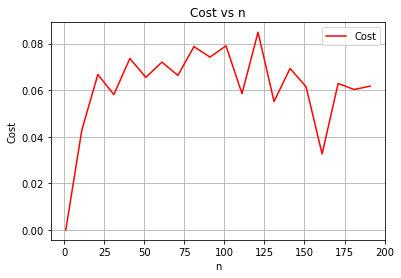

In [22]:
plt.plot(ns, n_costs, "r", label="Cost")
plt.title("Cost vs n")
plt.xlabel("n")
plt.ylabel("Cost")
plt.legend()
plt.grid()

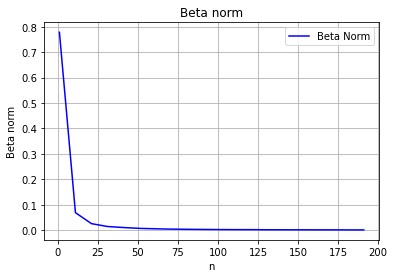

In [21]:
plt.plot(ns, n_beta_norm, "b", label="Beta Norm")
plt.title("Beta norm")
plt.xlabel("n")
plt.ylabel("Beta norm")
plt.legend()
plt.grid()

### Observations

As we can see clearly from the graphs, only the beta norm varies as expected. That is, the fit becomes better as we increase `n`, but for cost, there is not much variance after some n

# Submission Details

```yaml
author: Dhruva Sambrani
roll-no: ms18163
```